## Data Clustering

**Objective:**
Implement Customer Clustering Model through K-Means Algorithm.


### 1. Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# scalling
from sklearn.preprocessing import StandardScaler
# modelling
from sklearn.cluster import KMeans
#silhoute
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [3]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Or, only disable specific warnings based on category
# Example: Disabling DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_csv('C:/Users/hp/Downloads/PortoBuilder/Kalbe Internship/Final Project/Case Study Data Scientist/merged_data.csv')

In [5]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,Oat,16000,Gita Ginara,Gita,General Trade,6966667.0,110416664.0,37,0,Married,"5,35"
1,TR32057,235,2022-06-10,P7,9400,3,28200,7,Coffee Candy,9400,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"
2,TR47938,235,2022-10-18,P3,7500,4,30000,7,Crackers,7500,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"
3,TR49065,235,2022-10-08,P5,4200,4,16800,7,Thai Tea,4200,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"
4,TR50919,235,2022-08-18,P7,9400,4,37600,7,Coffee Candy,9400,Buana Indah,Buana,General Trade,3316694.0,114590111.0,37,0,Married,"5,35"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   4908 non-null   object 
 1   CustomerID      4908 non-null   int64  
 2   Date            4908 non-null   object 
 3   ProductID       4908 non-null   object 
 4   Price_x         4908 non-null   int64  
 5   Qty             4908 non-null   int64  
 6   TotalAmount     4908 non-null   int64  
 7   StoreID         4908 non-null   int64  
 8   Product Name    4908 non-null   object 
 9   Price_y         4908 non-null   int64  
 10  StoreName       4908 non-null   object 
 11  GroupStore      4908 non-null   object 
 12  Type            4908 non-null   object 
 13  Latitude        4908 non-null   float64
 14  Longitude       4908 non-null   float64
 15  Age             4908 non-null   int64  
 16  Gender          4908 non-null   int64  
 17  Marital Status  4908 non-null   o

In [7]:
df.shape

(4908, 19)

### 2. Data aggregation

In [9]:
aggregated_data = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [10]:
aggregated_data.rename(columns={'TransactionID' : "TotalTransaction", 'Qty' : 'TotalQuantity'}, inplace=True)

In [11]:
aggregated_data.head()

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
0,1,17,60,623300
1,2,12,56,382300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [12]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CustomerID        447 non-null    int64
 1   TotalTransaction  447 non-null    int64
 2   TotalQuantity     447 non-null    int64
 3   TotalAmount       447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [13]:
aggregated_data.describe()

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
count,447.000000,447.000000,447.000000,447.000000
mean,224.000000,10.979866,39.953020,353866.890380
std,129.182042,3.222267,12.655314,123684.551475
min,1.000000,3.000000,10.000000,84300.000000
25%,112.500000,9.000000,31.000000,263700.000000
50%,224.000000,11.000000,39.000000,340800.000000
75%,335.500000,13.000000,48.500000,438850.000000
max,447.000000,21.000000,79.000000,846700.000000


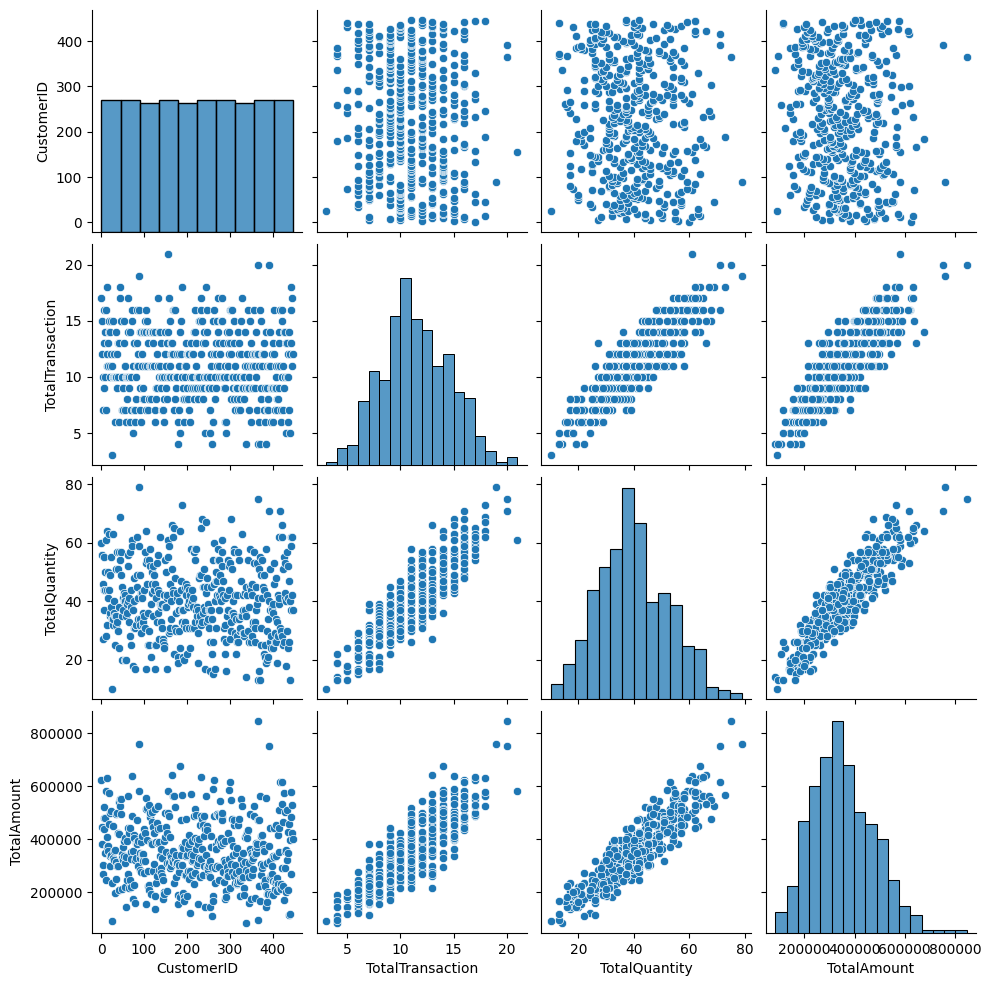

In [14]:
sns.pairplot(data = aggregated_data)

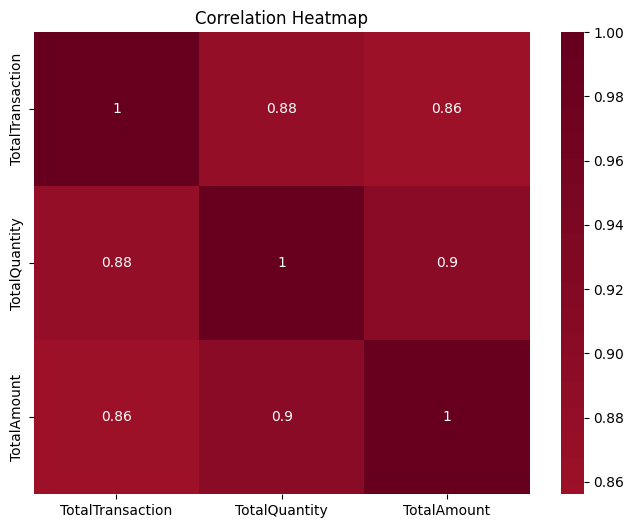

In [16]:
# Menghitung korelasi antara variabel
correlation_matrix = aggregated_data[['TotalTransaction', 'TotalQuantity', 'TotalAmount']].corr()

# Membuat heatmap untuk visualisasi korelasi dengan colormap 'RdBu_r'
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.show()

A robust correlation among attributes may suggest the existence of distinct data clusters.

### 3. Finding KMeans

In [17]:
# Scaling
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(aggregated_data[['TotalTransaction','TotalQuantity','TotalAmount']].astype(float))

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['TotalTransaction','TotalQuantity','TotalAmount'])

In [18]:
new_dfoutlier_std.head()

,TotalTransaction,TotalQuantity,TotalAmount
0,1.870385,1.585851,2.180830
1,0.316944,1.269424,0.230142
2,1.249009,1.269424,0.747357
3,-0.304433,0.478357,-0.415771
4,-1.236498,-1.024671,-0.690162


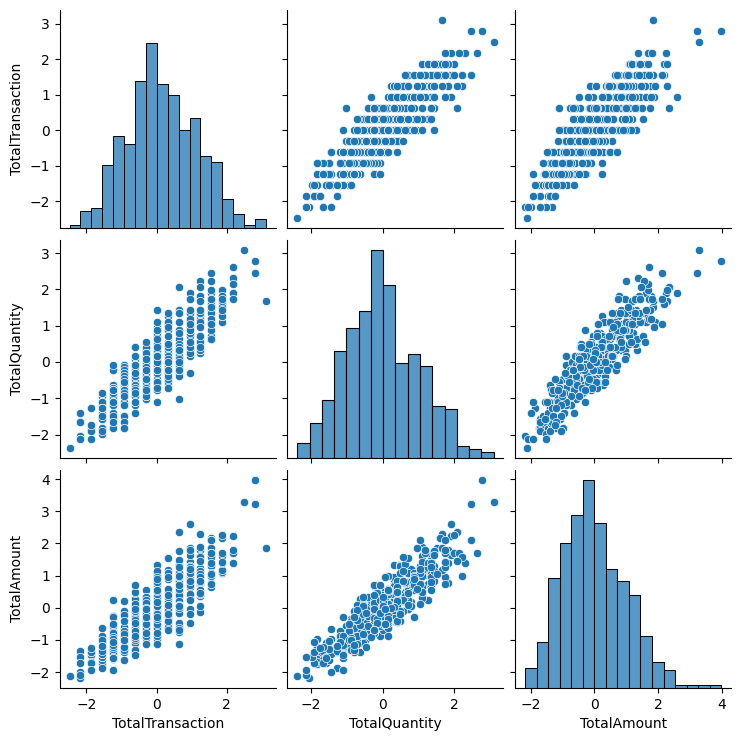

In [19]:
sns.pairplot(new_dfoutlier_std)

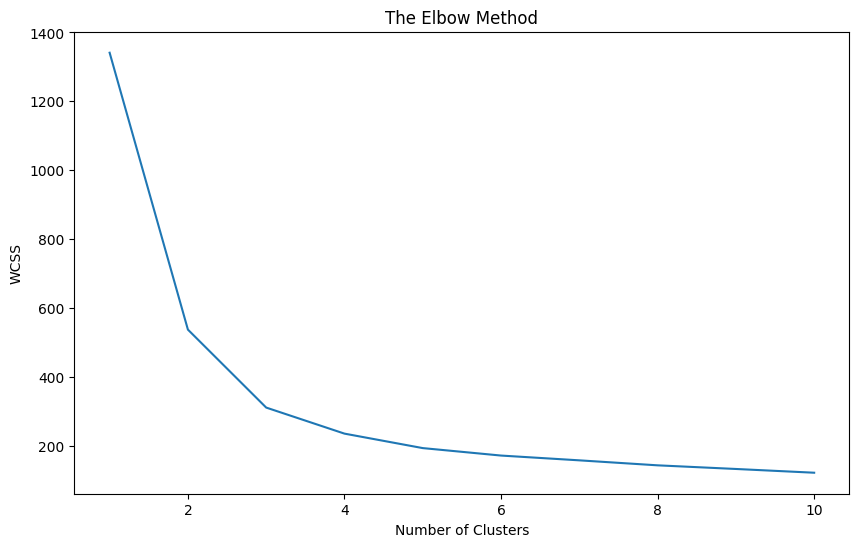

In [20]:
# Elbow Method
# declare Within-Cluster Sum of Squares (wcss)
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(new_dfoutlier_std)
  wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

After using the elbow method, selecting **either 3 or 4 clusters** seems appropriate. Alternatively, employing the silhouette method can help determine the optimal cluster count.

In [21]:
# Silhoute Method
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(new_dfoutlier_std).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_dfoutlier_std,labels,metric="euclidean",random_state=42)))

Silhouette score for k(clusters) = 2 is 0.49073124255420875
Silhouette score for k(clusters) = 3 is 0.45013883130333615
Silhouette score for k(clusters) = 4 is 0.37978679460070924
Silhouette score for k(clusters) = 5 is 0.3366719986628157
Silhouette score for k(clusters) = 6 is 0.2961691177761352
Silhouette score for k(clusters) = 7 is 0.31393355912227994
Silhouette score for k(clusters) = 8 is 0.2865261050917364
Silhouette score for k(clusters) = 9 is 0.257667211878615
Silhouette score for k(clusters) = 10 is 0.27863665362981216
Silhouette score for k(clusters) = 11 is 0.2743585050664573
Silhouette score for k(clusters) = 12 is 0.2598460467959902


Although the silhouette score suggests 2 clusters as optimal, in this scenario, **we opt for 3 clusters.**

In [23]:
# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(new_dfoutlier_std)
labels = kmeans.labels_
new_dfoutlier_std['label_kmeans'] = labels

In [24]:
new_dfoutlier_std.head()

,TotalTransaction,TotalQuantity,TotalAmount,label_kmeans
0,1.870385,1.585851,2.180830,1
1,0.316944,1.269424,0.230142,1
2,1.249009,1.269424,0.747357,1
3,-0.304433,0.478357,-0.415771,2
4,-1.236498,-1.024671,-0.690162,0


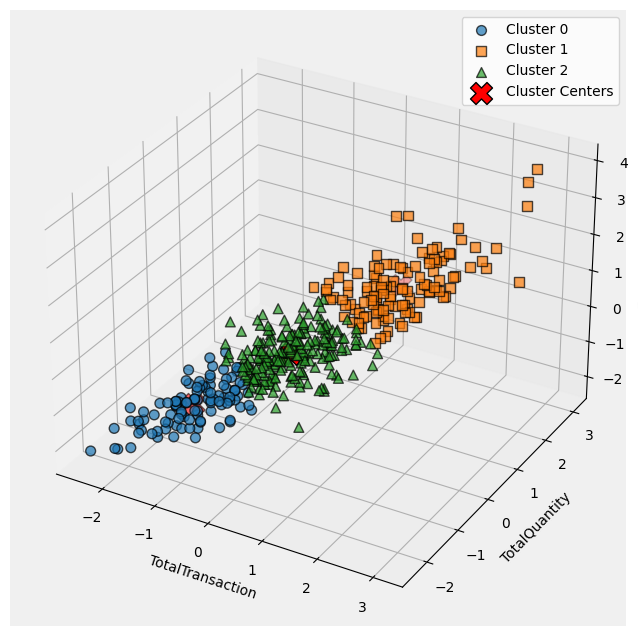

In [35]:
# Define colors and markers for clusters
colors_cluster = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']

# PLOTTING
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for points in clusters
for cluster_id in range(3):
    cluster_data = new_dfoutlier_std[new_dfoutlier_std["label_kmeans"] == cluster_id]
    ax.scatter(cluster_data["TotalTransaction"], cluster_data["TotalQuantity"], cluster_data["TotalAmount"],
               c=colors_cluster[cluster_id], s=50, marker=markers[cluster_id], edgecolor='black',
               alpha=0.7, label=label_cluster[cluster_id])

# Scatter plot for cluster centers (red)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=250, marker='X', edgecolor='black', label='Cluster Centers')

# Set labels and legend
ax.set_xlabel('TotalTransaction')
ax.set_ylabel('TotalQuantity')
ax.set_zlabel('TotalAmount')
ax.legend()

# Customize grid lines and background color
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_facecolor('#f0f0f0')

plt.show()


In [29]:
# copy label cluster to origin data
df_customer_clustering = aggregated_data.copy()
df_customer_clustering['cluster'] = kmeans.labels_

In [30]:
df_customer_clustering.head()

,CustomerID,TotalTransaction,TotalQuantity,TotalAmount,cluster
0,1,17,60,623300,1
1,2,12,56,382300,1
2,3,15,56,446200,1
3,4,10,46,302500,2
4,5,7,27,268600,0


In [31]:
# Calculate the average metrics for each cluster, including customer count, mean TotalTransaction, mean TotalQuantity, and mean TotalAmount.
df_customer_clustering.groupby('cluster').agg({'CustomerID':'count',
                                               'TotalTransaction':'mean',
                                               'TotalQuantity':'mean',
                                               'TotalAmount':'mean'
                                               }).sort_values(by='TotalAmount').reset_index()

,cluster,CustomerID,TotalTransaction,TotalQuantity,TotalAmount
0,0,106,7.009434,24.669811,207579.245283
1,2,219,10.776256,38.511416,337747.031963
2,1,122,14.795082,55.819672,509905.737705


**Cluster 2 Dominates Customer Count:**
Cluster 2 comprises the largest customer segment in terms of numbers.

**Cluster 0 (Moderate Spending):**
Cluster 0 denotes customers making moderate purchases in terms of quantity and value.

**Cluster 1 (High-Value Shoppers):**
Cluster 1 represents customers engaged in high-value purchases, indicating significant monetary transactions.

**Cluster 2 (Balanced Shoppers):**
Cluster 2 illustrates customers with balanced shopping habits, displaying equilibrium between quantity and monetary value in their purchases.

In [36]:
# save csv
df_customer_clustering.to_csv('C:/Users/hp/Downloads/PortoBuilder/Kalbe Internship/Final Project/Case Study Data Scientist/df_customer_clustering.csv',index=False)

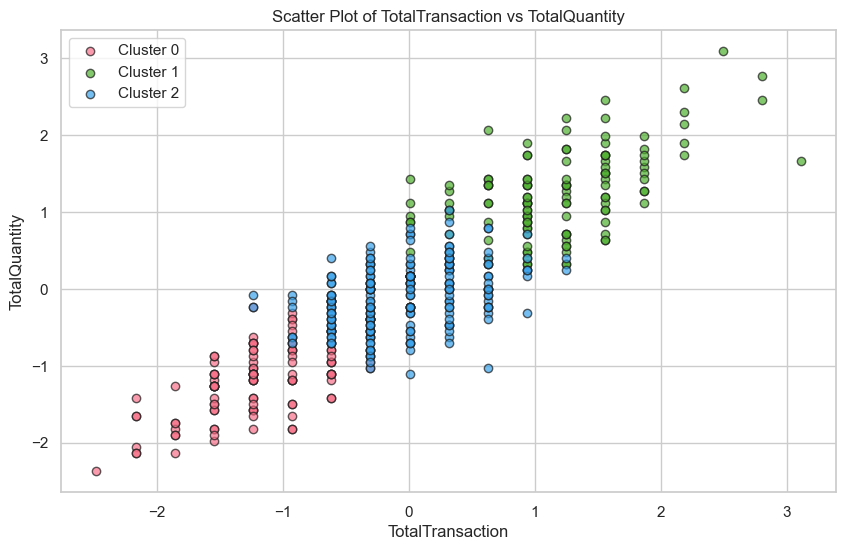

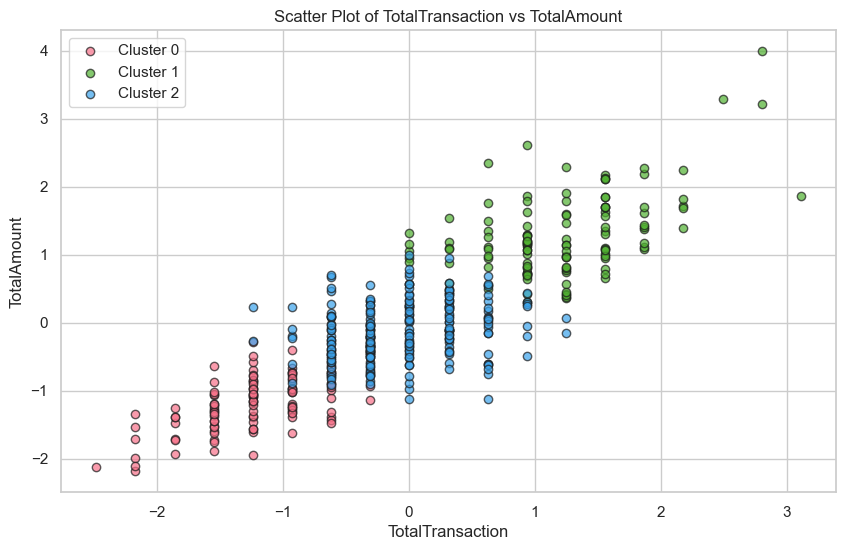

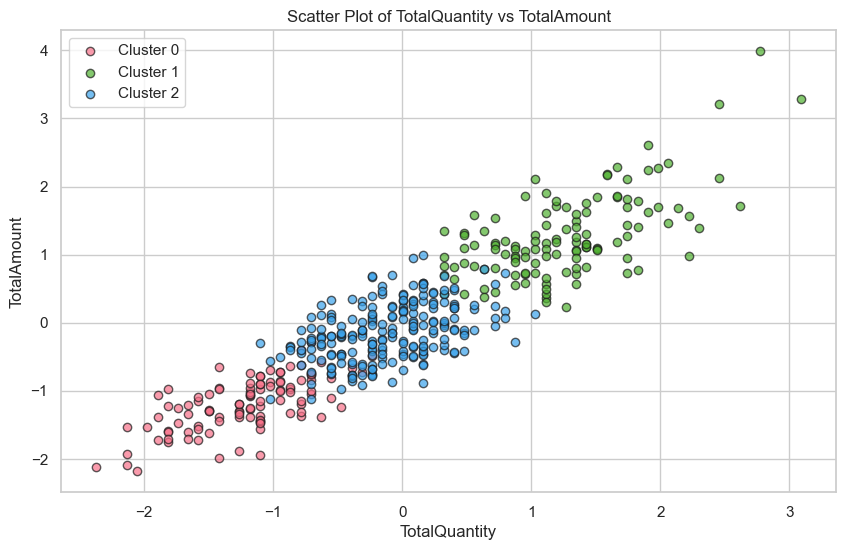

In [38]:
# Set style and define a color palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 3)  # You can choose a different palette if desired

# Create scatter plots for each feature pair
feature_pairs = [('TotalTransaction', 'TotalQuantity'), ('TotalTransaction', 'TotalAmount'), ('TotalQuantity', 'TotalAmount')]

for pair in feature_pairs:
    plt.figure(figsize=(10, 6))
    for cluster_num in range(len(palette)):
        cluster_data = new_dfoutlier_std[new_dfoutlier_std.label_kmeans == cluster_num]
        plt.scatter(cluster_data[pair[0]], cluster_data[pair[1]], color=palette[cluster_num], label=f'Cluster {cluster_num}', alpha=0.7, edgecolors='k')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.legend()
    plt.show()


### Conclusion

**Moderate Spenders (Cluster 0):**
1. Marketing Strategy: For moderate spenders, the goal is to encourage them to increase their purchases. To do this, we should focus on building customer loyalty and retention. Provide targeted discounts or loyalty programs to incentivize repeat purchases.
2. Promotions: Offer discounts on bundled products or personalized offers based on their previous purchases.
3. Initiatives: Launch a loyalty program with exclusive discounts and early access to new products. Send personalized product recommendations based on their past preferences.
seces.

**Balanced Shoppers (Cluster 2):**

1. Marketing Strategy: For balanced shoppers, the strategy is to maintain their balanced spending habits and potentially increase the frequency of purchases.
2. Promotions: Highlight the value of variety and balanced shopping. Offer bundle deals that encourage cross-category purchases.
3. Initiatives: Create marketing campaigns emphasizing the importance of balanced shopping for a healthy lifestyle. Offer discounts on complementary products bought together.

**High-Value Shoppers (Cluster 1):**

1. Marketing Strategy: High-value shoppers are crucial for revenue. The strategy is to continue providing premium experiences to maintain and grow their spending.
2. Promotions: Offer exclusive premium products and early access to sales. Implement a tiered loyalty program with premium benefits.
3. Initiatives: Launch a premium membership program with personalized concierge services. Send personalized product recommendations and exclusive previews.

## Suggestion

**Final Summary for Planning Next Steps:**
1. Tailor marketing strategies to each customer segment to maximize their potential.
2. Leverage data analytics for personalized marketing campaigns.
3. Continuously monitor and analyze customer behavior for timely adjustments.
4. Invest in customer engagement and retention for sustainable growth.
5. Expand your market reach by exploring new products or partnerships.
6. Remember, the customer's journey is ongoing, so adapt strategies as needed.needed.

In [40]:

import nbformat

def ipynb_to_py(input_notebook, output_script):
    with open(input_notebook, 'r', encoding='utf-8') as nb_file:
        notebook = nbformat.read(nb_file, as_version=4)
    
    code_cells = []
    for cell in notebook.cells:
        if cell.cell_type == 'code':
            code_cells.append(cell.source)
    
    with open(output_script, 'w', encoding='utf-8') as py_file:
        py_file.write('\n'.join(code_cells))

# Replace 'input_notebook.ipynb' with the name of your input Jupyter Notebook file
# Replace 'output_script.py' with the desired name for the output Python script file
input_notebook = 'DataClustering_Kalbe_Ricky.ipynb'
output_script = 'DataClustering_Kalbe_Ricky.py'

ipynb_to_py(input_notebook, output_script)
